# Подсчет pi с помощью метода Монте-Карло

## Формулы
- square area: $s = (2 r)^2$
- circle area: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

## Изображение для визуализации концепции
![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)


In [15]:
# Импорт необходимых модулей
import random
import matplotlib.pyplot as plt

In [19]:
# Инициализация количества "бросков" 
num_points = 1000


In [20]:
# Здесь мы "бросаем дротики" и подсчитываем количество попаданий
points = []
hits = 0
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits += 1
        points.append((x, y, "red"))
    else:
        points.append((x, y, "blue"))

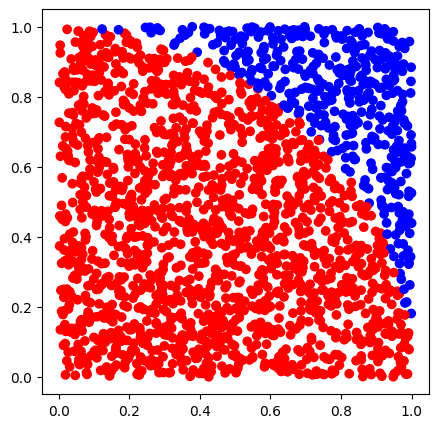

In [25]:
# Распакуем точки в 3 списка 
x, y, colors = zip(*points)

# Определяем размеры фигуры
fig, ax = plt.subplots()
fig.set_size_inches(5.0, 5.0)

# Рисуем результат
ax.scatter(x, y, c=colors)

In [14]:
# Считаем оценку
fraction = hits / num_points
4 * fraction

0.004

In [2]:
import random
from ipywidgets import interact, widgets

%matplotlib inline
from matplotlib import pyplot

def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
        else:
            points.append((x, y, False))
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points
    
def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)
    
def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

In [3]:
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100,
value=1000))

interactive(children=(IntSlider(value=1000, description='num_points', max=10000, min=100, step=100), Output())…

<function __main__.experiment(num_points)>

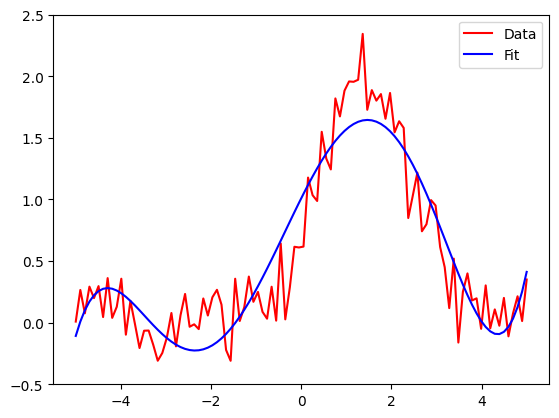

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)
def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y
def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit
def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()
x, y = noisy_gaussian()
yfit = fit(x, y, n=5) # fit a 5th order polynomial to it
plot(x, y, yfit)

In [2]:
import numpy as np

In [3]:
def step():
    import random
    return 1. if random.random() > .5 else -1.

In [4]:
def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
        return x

In [5]:
n = 100000
x = walk(n)

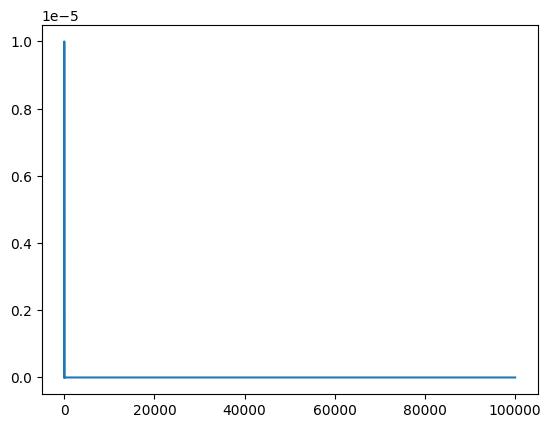

In [6]:
import matplotlib.pyplot as plt
plt.plot(x);

In [7]:
t1 = %timeit -o walk(n)

17.9 µs ± 103 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
t1.best

1.7774611000204458e-05

In [9]:
%%prun
walk(n)

         54 function calls (52 primitive calls) in 0.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      2/1    0.001    0.001    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
      2/1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 2897735318.py:1(walk)
        3    0.000    0.000    0.000    0.000 socket.py:621(send)
        1    0.000    0.000    0.000    0.000 kernelbase.py:283(poll_control_queue)
        1    0.000    0.000    0.000    0.000 _base.py:537(set_result)
        3    0.000    0.000    0.000    0.000 enum.py:1528(__or__)
        1    0.000    0.000    0.000    0.000 {built-in method numpy.zeros}
        3    0.000    0.000    0.000    0.000 enum.py:709(__call__)
        1    0.000    0.000    0.000    0.000 1062327543.py:1(step)
        1    0.000    0.

In [10]:
!pip install line_profiler


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for line_profiler from https://files.pythonhosted.org/packages/13/9d/bd9a044d4e8aaa2ef086670a2058abc2435ffc628c251d657772712e1ec8/line_profiler-4.1.2-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/123.5 kB ? eta -:--:--
   --------- ------------------------------ 30.7/123.5 kB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 92.2/123.5 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 123.5/123.5 kB 1.2 MB/s eta 0:00:00


In [11]:
%load_ext line_profiler

In [12]:
%lprun?

Docstring:
Execute a statement under the line-by-line profiler from the
line_profiler module.

Usage:

    %lprun -f func1 -f func2 <statement>

The given statement (which doesn't require quote marks) is run via the
LineProfiler. Profiling is enabled for the functions specified by the -f
options. The statistics will be shown side-by-side with the code through the
pager once the statement has completed.

Options:

-f <function>: LineProfiler only profiles functions and methods it is told
to profile.  This option tells the profiler about these functions. Multiple
-f options may be used. The argument may be any expression that gives
a Python function or method object. However, one must be careful to avoid
spaces that may confuse the option parser.

-m <module>: Get all the functions/methods in a module

One or more -f or -m options are required to get any useful results.

-D <filename>: dump the raw statistics out to a pickle file on disk. The
usual extension for this is ".lprof". These s

In [13]:
%lprun -f walk walk(10000)

Timer unit: 1e-07 s

Total time: 9.81e-05 s
File: C:\Users\danya\AppData\Local\Temp\ipykernel_26192\2897735318.py
Function: walk at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def walk(n):
     2         1        586.0    586.0     59.7      x = np.zeros(n)
     3         1         24.0     24.0      2.4      dx = 1. / n
     4         1         47.0     47.0      4.8      for i in range(n - 1):
     5         1        273.0    273.0     27.8          x_new = x[i] + dx * step()
     6         1         18.0     18.0      1.8          if x_new > 5e-3:
     7                                                       x[i + 1] = 0.
     8                                                   else:
     9         1         22.0     22.0      2.2              x[i + 1] = x_new
    10         1         11.0     11.0      1.1          return x

In [14]:
%lprun -f step walk(10000)

Timer unit: 1e-07 s

Total time: 4.8e-06 s
File: C:\Users\danya\AppData\Local\Temp\ipykernel_26192\1062327543.py
Function: step at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def step():
     2         1         26.0     26.0     54.2      import random
     3         1         22.0     22.0     45.8      return 1. if random.random() > .5 else -1.

Сделать import random перед функцией, а лучше сделать импорт конкретной нужной функции, в данном случае random(). То есть import random from random